<b><font size="6" color = 'green'>Linear Regression - Algorithm, Supervised Machine Learning</font></b>

<font size = "4"><b>Linear Regression</b></font> is a <font size = "4"><b>Supervised Machine Learning Algorithm</b></font> which is used to define a linear relationship between any 2 objects defined by any number of parameters.

First refer https://www.youtube.com/watch?v=zPG4NjIkCjc  and it will be more easy to understand the code.

<font size = "4"><b>Importing required libraries</b></font>

In [1]:
import numpy as np
import pandas as pd

<font size = "4"><b>Reading Data into DataFrame</b></font>

In [3]:
dfx = pd.read_csv('linearX.csv')
dfy = pd.read_csv('linearY.csv')
#dfx.head()
#dfy.head()

In [4]:
# convert pandas DataFrame to numpy arrray

X = dfx.values
Y = dfy.values
print(type(X))
print(type(Y))
X = X.reshape((-1,))          #making a linear array(no columns)....number of rows are mandatory(-1 is writenn as we don't know how much rows must b there, it will automtically assign desired number of rows to completely fill all the elements)
Y = Y.reshape((-1,))
print(X.shape)
print(Y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(99,)
(99,)


<font size = "4"><b>Data Visualisation</b></font>

In [18]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

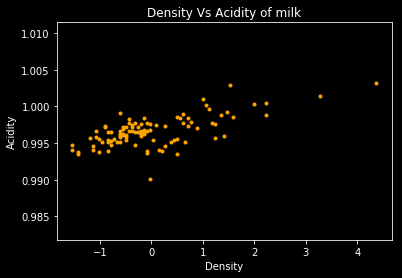

In [19]:
plt.scatter(X, Y, color = 'orange', marker = '.')
plt.title('Density Vs Acidity of milk')
plt.xlabel("Density")
plt.ylabel("Acidity")
plt.show()

# Normalisation
X = (X - X.mean())/(X.std())

<font size = "4"><b>Helper Functions</b></font>

In [33]:
# hypothesis is hypothetical equation of the best fit line.  
def hypothesis(x, theta):
    return theta[0] + x*theta[1]

# The vertical distance of points from line(we need to minimise it).
def error(Y, X, theta):
    m = X.shape[0]
    total_error = 0
    
    for i in range(m):
        e = (Y[i] - hypothesis(X[i],theta))**2
        total_error += e
        
    return 0.5*total_error


# The gradient wrt theta0 and theta1.
def get_grad(X, Y, theta):
    grad0, grad1 = 0, 0
    m = X.shape[0]
    
    for i in range(m):
        hx = hypothesis(X[i], theta)
        grad0 += hx - Y[i]
        grad1 += (hx - Y[i])*X[i]
    
    return grad0, grad1

<font size = "4"><b>Implementing the Algorithm</b></font>

In [40]:
# learning_rate is the pace of algorithm to learn or a step from random theta to local minima.
def gradientDescent(X, Y, learning_rate=0.001):
    theta = np.zeros((2,))
    
    maxItr = 100
    itr = 1
    error_list = []
    
    while(itr < maxItr):
        grad0, grad1 = get_grad(X, Y, theta)
        e = error(Y, X, theta)
        error_list.append(e)
        theta[0] = theta[0] - learning_rate*grad0
        theta[1] = theta[1] - learning_rate*grad1
        itr += 1
    return theta, error_list

<font size = "4"><b>This plot shows the gradual decrease in errors wrt learning_rate</b></font>(for more try changing the learning rate and analyse).

[0.99660131 0.0013579 ]


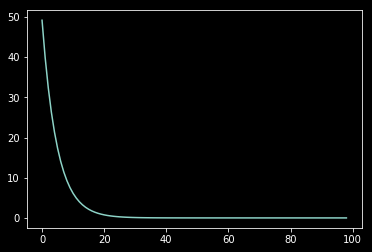

In [41]:
theta, error_list = gradientDescent(X, Y)
print(theta)

plt.plot(error_list)
plt.show()

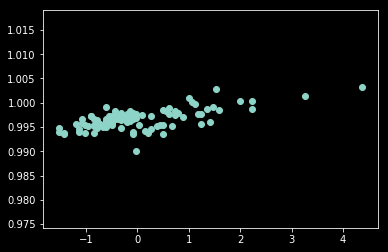

In [42]:
plt.scatter(X, Y)
plt.show()

<font size = "4"><b>Giving my own test cases using random numbers.</b></font>

In [37]:
testX = np.linspace(-4, 6, 10)
print(testX.shape)
#print(testX)


predictedY = []
#for tx in testX:
py = hypothesis(testX, theta)
predictedY.append(py)
prediction = np.array(predictedY)
j = []
j = [j for sub in prediction for j in sub]       # Converting a 2d list to a 1d list.
print(j)

(10,)
[0.9911697298240165, 0.9926785020850832, 0.99418727434615, 0.9956960466072167, 0.9972048188682835, 0.9987135911293502, 1.000222363390417, 1.0017311356514838, 1.0032399079125505, 1.0047486801736172]


<font size = "4"><b>Plot of Algorithm</b></font>

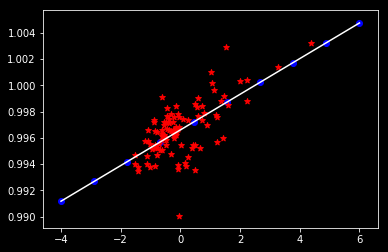

In [43]:
plt.plot(testX, j, color = 'white')
plt.scatter(testX, j, color = 'blue')
plt.scatter(X, Y, marker = '*', color = 'red')
plt.show()